In [2]:
import numpy as np
import matplotlib.pyplot as plt

import random

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *

# Baseline with preselected genes for BIDDY D6

In [2]:
#Load preprocess data
D6 = np.array(pd.read_csv ('../data/processed_data/D6csv_process.csv'))
y = np.array(D6[:,-1],dtype=int)
D6 = D6[:,0:-1]

In [3]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6,y)

In [4]:
print(D6.shape, len(pred))
acc = model.score_
print(acc)

(116, 2285) 116
0.7073170731707317


In [5]:
print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5087719298245614, 0.9975869696360345, 0.7073170731707317, 0.9943876528362398, 0.2926829268292683, 0.49122807017543857)


In [3]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Filter methods

# Mutual information maximizer (MIM)

[  18   21   31   32   40   46   47   51   57  125  144  159  207  231
  233  249  290  319  339  341  342  375  424  442  470  473  616  618
  648  652  663  681  696  739  750  802  836  850  857  884  888  890
  913  984  986  987  988  993 1023 1064 1067 1068 1133 1137 1149 1152
 1153 1173 1175 1187 1224 1238 1256 1268 1269 1318 1336 1366 1413 1477
 1478 1484 1503 1512 1534 1542 1622 1624 1627 1651 1702 1808 1823 1836
 1860 1920 1951 1966 2017 2038 2098 2140 2163 2165 2195 2205 2209 2216
 2227 2271] 0.9807692307692307


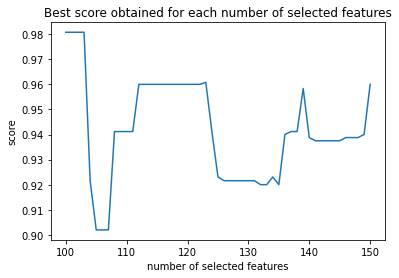

In [46]:
N = np.arange(100,151,1)
best_subset, best_score = MIM(y, D6, FamiliesClusters, compute_precision,True,N, 3, plot=True)
print(best_subset, best_score)

In [47]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

100
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.8793103448275862, 0.9997474747474747, 0.9807692307692307, 0.9982349974785678, 0.019230769230769232, 0.1206896551724138)


# Mutual information feature selection (MIFS)


[   0    8   14   16   17   20   22   23   25   31   32   34   36   39
   42   48   52   54   56   61   62   69   72   73   77   78   81   82
   84   85   88   90   91   92   93   97   99  100  101  102  104  105
  106  108  110  111  112  114  116  118  123  125  127  128  129  134
  141  146  154  156  158  159  160  161  162  164  172  175  179  181
  182  183  184  187  190  193  195  197  198  204  205  207  209  211
  212  216  219  224  228  231  232  233  235  237  238  242  243  246
  247  248  251  252  254  255  256  257  259  260  264  266  268  269
  276  277  279  281  291  294  295  296  297  301  303  305  308  311
  312  314  315  317  319  320  332  336  338  340  347  349  350  351
  358  359  360  365  366  369  370  373  374  375  376  377  378  379
  380  383  390  392  393  396  397  398  399  401  402  404  405  407
  416  418  419  420  425  429  430  433  438  439  443  446  450  451
  454  458  459  460  462  464  470  471  472  479  481  482  487  493
  496 

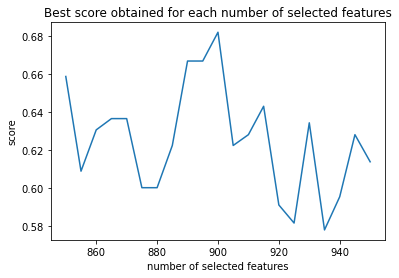

In [42]:
#N = np.array([80,100,125,150,200,250,300,350,400])
N = np.arange(850,951,5)
best_subset, best_score = MIFS(y, D6, FamiliesClusters, compute_precision,True,N, 0.1, plot=True)
print(best_subset, best_score)

In [43]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

900
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5357142857142857, 0.9970351545955104, 0.6818181818181818, 0.9945078158005914, 0.3181818181818182, 0.4642857142857143)


# Joint Mutual Information (JMI)

[   1    2    3    5    6    7    9   10   11   12   13   15   21   26
   27   29   33   35   37   38   40   41   43   44   45   49   50   51
   55   57   63   64   65   67   68   70   71   75   76   80   83   94
   95   96   98  107  109  113  115  117  119  120  121  126  132  136
  138  140  142  143  144  145  148  149  150  152  157  167  170  171
  177  178  186  188  191  194  200  201  202  206  218  220  221  222
  227  229  240  241  245  249  250  258  261  262  265  267  274  280
  282  283  285  288  290  292  293  298  299  302  304  307  318  322
  323  324  325  327  329  330  335  337  341  342  343  344  345  346
  354  355  356  363  364  368  371  381  382  386  387  388  391  394
  410  412  413  415  417  421  423  424  426  431  432  436  441  448
  449  453  456  457  461  467  469  473  475  476  477  480  484  486
  489  490  491  492  494  497  498  510  515  517  524  526  527  535
  539  544  546  548  554  559  562  563  566  568  574  575  582  590
  591 

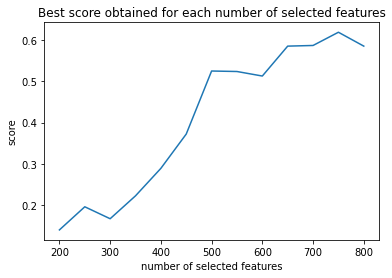

In [14]:
N = np.arange(200,801,50)
best_subset, best_score = JMI(y, D6, FamiliesClusters, compute_precision ,True, N, plot=True)
print(best_subset, best_score)

In [15]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

750
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.4642857142857143, 0.9967293540474244, 0.6190476190476191, 0.9938850387280881, 0.38095238095238093, 0.5357142857142857)


# Double input symmetrical relevance (DISR)

[   1    2    3    5    6    7    9   10   11   12   13   15   21   26
   27   29   33   35   37   38   40   41   43   44   45   50   51   57
   63   64   65   67   68   70   71   75   76   80   83   94   95   96
   98  107  109  115  117  119  120  121  132  136  138  142  143  144
  145  148  149  150  152  157  167  170  171  177  178  186  191  194
  200  201  202  206  218  220  221  222  227  229  240  241  245  249
  250  258  261  262  265  267  274  280  282  283  285  288  290  292
  293  298  299  302  304  307  318  322  323  324  325  329  330  335
  337  341  342  343  344  345  346  354  356  363  364  368  371  381
  382  386  387  388  391  394  410  412  413  415  417  421  423  424
  431  432  436  441  448  449  453  456  457  461  467  469  473  475
  476  477  480  484  489  490  491  492  494  497  510  517  524  526
  527  535  539  544  546  559  562  563  566  568  574  575  590  591
  594  597  603  606  609  611  612  615  617  625  628  631  643  645
  649 

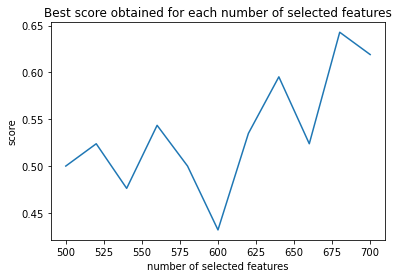

In [128]:
N = np.arange(500,701,20)
best_subset, best_score = DISR(y, D6, FamiliesClusters, compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [129]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

680
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.47368421052631576, 0.9969331425066449, 0.6428571428571429, 0.9938850387280881, 0.35714285714285715, 0.5263157894736842)


# Fisher's score

[   0    4    8   10   14   16   18   21   24   28   32   33   34   39
   40   42   47   49   54   55   58   62   63   65   69   70   71   73
   75   76   78   80   81   83   86   88   90   93   94   96   97   98
  101  105  108  114  117  119  120  122  123  125  127  130  135  136
  138  140  141  142  145  151  154  156  157  158  159  162  163  165
  166  167  171  175  176  178  182  186  187  192  193  194  198  199
  200  201  203  204  206  208  209  210  215  217  220  223  224  225
  227  229  230  231  233  235  237  240  243  245  247  251  253  256
  258  264  265  268  270  272  275  276  278  282  287  288  293  294
  298  299  301  303  311  316  317  318  323  325  330  331  333  337
  338  341  343  344  346  349  351  352  354  358  360  364  368  369
  374  376  377  378  380  382  383  388  392  393  395  398  399  401
  404  405  406  407  411  413  415  418  420  421  425  430  431  435
  436  438  441  443  444  447  449  450  455  457  459  460  462  463
  464 

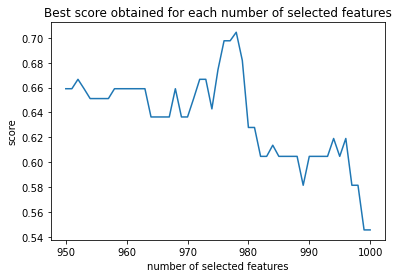

In [60]:
N = np.arange(950,1001,1)
best_subset, best_score = fishers_score(y, D6, FamiliesClusters,compute_precision,True,N, plot=True)
print(best_subset, best_score)

In [61]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

978
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5636363636363636, 0.9972475121744654, 0.7045454545454546, 0.9949302915082383, 0.29545454545454547, 0.43636363636363634)


# Laplacian score

[   0    2    3 ... 2281 2283 2284] 0.7560975609756098


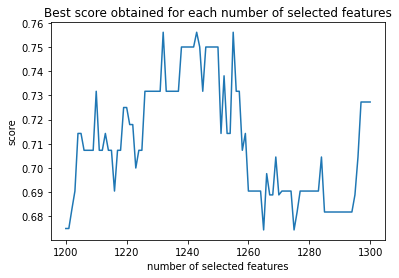

In [78]:
#N = np.arange(800,1001,1)
N = np.arange(1200,1301,1)

best_subset, best_score = laplacian_score(y, D6, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [79]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1232
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5636363636363636, 0.9979899497487437, 0.7560975609756098, 0.995189416716777, 0.24390243902439024, 0.43636363636363634)


# ReliefF algorithm

[   0    1    2 ... 2276 2281 2282] 0.75


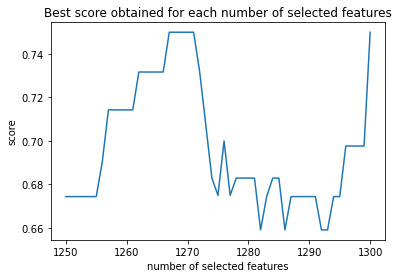

In [90]:
N = np.arange(1250,1301,1)
best_subset, best_score = reliefF(y, D6, FamiliesClusters,compute_precision,True, N, 5, plot=True)
print(best_subset, best_score)

In [91]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1267
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5263157894736842, 0.9980209776370473, 0.75, 0.9946745562130177, 0.25, 0.47368421052631576)


# Fast Correlation Based Filter algorithm (FCBF)

[   0    2    3 ... 2281 2282 2284] 0.75


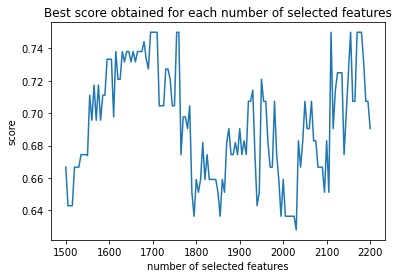

In [124]:
N = np.arange(1500,2201,5)
best_subset, best_score = FCBF(y, D6, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)

In [125]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1695
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.5789473684210527, 0.997669985172633, 0.75, 0.9949302915082383, 0.25, 0.42105263157894735)


# Hilbert Schmidt Independence Criterion Lasso (HSIC Lasso)

Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.


C:\Users\Imane\anaconda3\lib\site-packages\pyHSICLasso\api.py:107: RuntimeWarning: B 20 must be an exact divisor of the number of samples 116. Number of blocks 5.8 will be approximated to 5.
  warnings.warn(msg, RuntimeWarning)


Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M set to 3.
Using Gaussian kernel for the features, Delta kernel for the outcomes.
Block HSIC Lasso B = 20.
M s

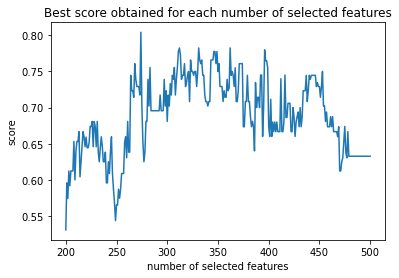

In [96]:
N = np.arange(200,501,1)
best_subset, best_score = HsicLasso(y, D6, FamiliesClusters,compute_precision,True, N, plot=True)
print(best_subset, best_score)    

In [97]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

274
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6379310344827587, 0.9980184940554822, 0.8043478260869565, 0.9953886693017128, 0.1956521739130435, 0.3620689655172414)


# Wrapper methods

# Stochastic optimization of features selection 

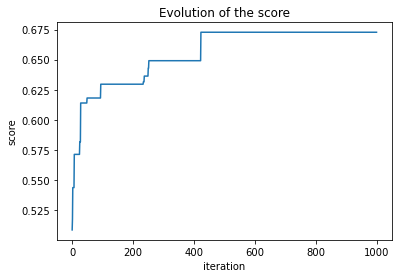

0.6727272727272727


In [8]:
best_subset, best_score  = hillclimbing(y, D6, FamiliesClusters, compute_sensitivity,True, 1000, 0.1, True)
print(best_score)

In [9]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1173
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6727272727272727, 0.9982740021574973, 0.8222222222222222, 0.9961248654467169, 0.17777777777777778, 0.32727272727272727)


# Stimulated annealing

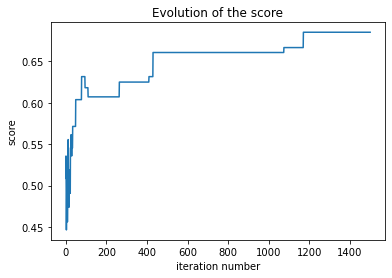

0.6851851851851852


In [10]:
best_subset, best_score  = stimulated_annealing(y, D6, FamiliesClusters, compute_sensitivity,True, 1500, 0.1, 1, True)
print(best_score)

In [11]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1173
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.6851851851851852, 0.998274374460742, 0.8222222222222222, 0.9963401506996771, 0.17777777777777778, 0.3148148148148148)


# Genetic feature selection algorithm

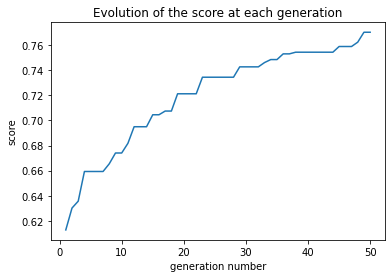

0.7702959830866808


In [17]:
best_subset, best_score  = genetic_fs(y,D6,FamiliesClusters,compute_sensitivity,True, 500, 0.5, 0.2, 50, 3, True)
print(best_score)

In [18]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

1668
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.7777777777777778, 0.9974772956609486, 0.8076923076923077, 0.9969742813918305, 0.19230769230769232, 0.2222222222222222)


# Hybrid methods

# Mutual information and stimulated annealing

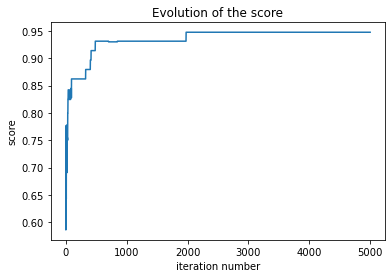

[  16   18   28   32   33   35   40   46   47   51   54   57   84   86
   89   95   96   98  125  143  155  159  171  178  181  216  218  225
  226  233  238  249  270  276  283  285  318  333  338  341  350  358
  382  400  404  421  424  433  442  470  473  485  507  527  535  544
  552  560  565  578  606  612  619  625  632  640  642  663  669  695
  696  723  724  739  750  762  774  776  780  794  802  815  825  843
  850  871  876  888  902  903  913  918  919  929  942  973  974  984
  993  997  998 1008 1012 1023 1027 1046 1064 1068 1091 1093 1103 1129
 1137 1148 1153 1174 1175 1176 1187 1221 1236 1254 1269 1278 1293 1317
 1339 1352 1353 1384 1385 1393 1396 1411 1413 1468 1477 1484 1500 1503
 1512 1521 1534 1542 1620 1623 1624 1627 1645 1687 1690 1702 1751 1757
 1764 1771 1779 1794 1804 1808 1815 1823 1836 1849 1874 1878 1920 1936
 1939 1946 1950 1958 1974 1976 2024 2031 2038 2057 2098 2110 2113 2130
 2140 2165 2168 2177 2227 2271 2274 2277] 0.9473684210526315


In [139]:
best_subset, best_score = MI_stimulated_annealing(y,D6, FamiliesClusters, compute_sensitivity,True, np.array([400]), 3, 5000, 0.05, 1, True)
print(best_subset, best_score)

In [140]:
print(len(best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_sensitivity,True)
pred = model.fit_predict(D6[:, best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

190
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9473684210526315, 0.9994339088593264, 0.9642857142857143, 0.9991511035653651, 0.03571428571428571, 0.05263157894736842)


# Mutual information and genetic feature selection

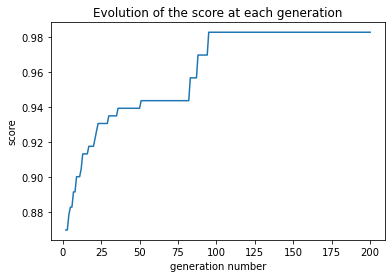

[  18   23   31   33   35   39   46   64   86   89  125  155  159  184
  218  226  231  233  239  283  295  318  324  329  343  358  400  421
  442  460  466  470  473  474  483  495  507  510  536  544  552  565
  587  616  621  663  724  737  739  780  802  813  815  836  843  885
  888  890  902  919  945  993  997  998 1002 1012 1023 1027 1064 1067
 1068 1124 1133 1137 1149 1153 1164 1175 1187 1224 1227 1238 1249 1259
 1318 1322 1339 1369 1384 1396 1413 1503 1534 1571 1574 1614 1622 1624
 1627 1639 1645 1671 1688 1695 1696 1706 1749 1779 1783 1804 1808 1811
 1815 1836 1851 1878 1946 1966 2017 2038 2057 2060 2098 2113 2131 2166
 2168 2182 2183 2195 2215 2216 2227 2228 2245 2269 2271] 0.982608695652174


In [6]:
D6_best_subset, best_score = MI_genetic_fs(y,D6, FamiliesClusters, compute_sensitivity,True, np.array([300]), 3,  300, 0.5, 0.2, 200, 3, True)
print(D6_best_subset, best_score)

In [7]:
print(len(D6_best_subset))
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(D6[:, D6_best_subset],y)

print("sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

137
sensitivity, specificity, precision, NPV, FDR, FNR =  (0.9827586206896551, 1.0, 1.0, 0.9997076878105817, 0.0, 0.017241379310344827)


In [22]:
D6_best = get_best_genes_names(D6_best_subset, '../data/processed_data/D6genes_interest.csv' ,'../data/optimized_subsets/D6genes_best.csv')